The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71 

Ambient pressure (AP) mbar 985.85 1036.56 1013.07 

Ambient humidity (AH) (%) 24.08 100.20 77.87 

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93 

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56 

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43 

Turbine after temperature (TAT) C 511.04 550.61 546.16 

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06 

Turbine energy yield (TEY) MWH 100.02 179.50 133.51 

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37 

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Downloads/gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

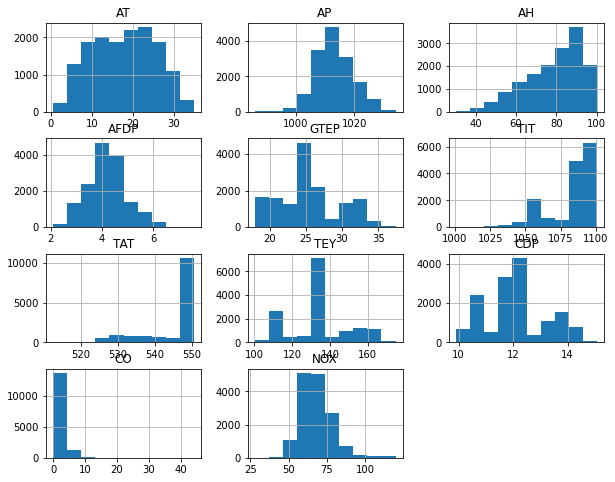

In [8]:
df.hist(figsize=(10,8))
plt.tight_layout

In [9]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [10]:
df2 = df.drop('TEY',axis = 1)
df2['TEY'] = df['TEY'] 

<AxesSubplot:>

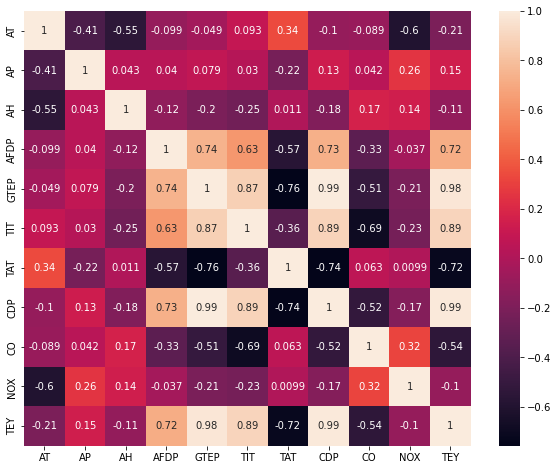

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True)

In [12]:
X = df.drop('TEY',axis = 1)
y = df['TEY']


In [13]:
norm = Normalizer()

In [14]:
vals = norm.fit_transform(X)
vals

array([[0.00437602, 0.64299944, 0.06175385, ..., 0.00676556, 0.00201257,
        0.05277329],
       [0.00432742, 0.64314925, 0.06194106, ..., 0.00675932, 0.00206409,
        0.05279385],
       [0.00439876, 0.64332579, 0.06118163, ..., 0.00676041, 0.00204145,
        0.05259099],
       ...,
       [0.00469232, 0.64997594, 0.06426514, ..., 0.00677104, 0.00514348,
        0.05872067],
       [0.00450928, 0.64800828, 0.06372468, ..., 0.00677937, 0.00402231,
        0.06000384],
       [0.00444121, 0.64567659, 0.0625246 , ..., 0.00678435, 0.00319351,
        0.05929686]])

In [15]:
X = pd.DataFrame(vals,columns=X.columns)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.004376,0.642999,0.061754,0.002233,0.012544,0.675727,0.350878,0.006766,0.002013,0.052773
1,0.004327,0.643149,0.061941,0.002232,0.012582,0.675613,0.350785,0.006759,0.002064,0.052794
2,0.004399,0.643326,0.061182,0.002221,0.012613,0.675594,0.350660,0.006760,0.002041,0.052591
3,0.004499,0.643415,0.060726,0.002219,0.012618,0.675548,0.350646,0.006762,0.002035,0.052706
4,0.004715,0.643585,0.060649,0.002229,0.012598,0.675455,0.350559,0.006764,0.002071,0.052465
...,...,...,...,...,...,...,...,...,...,...
15034,0.005795,0.645350,0.063187,0.002273,0.012299,0.673652,0.350534,0.006674,0.002900,0.051057
15035,0.005072,0.646823,0.063720,0.002254,0.012484,0.672802,0.349306,0.006709,0.003117,0.051389
15036,0.004692,0.649976,0.064265,0.002246,0.012615,0.670257,0.347059,0.006771,0.005143,0.058721
15037,0.004509,0.648008,0.063725,0.002220,0.012472,0.671436,0.348359,0.006779,0.004022,0.060004


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [17]:
model = Sequential()
model.add(Dense(12,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(8,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(1,kernel_initializer = 'uniform',activation = 'linear'))

2022-04-16 12:23:07.344037: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(optimizer='adam',loss='mean_absolute_error')

In [19]:
model.fit(X_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
504/504 [==============================] - 1s 1ms/step - loss: 127.3808
Epoch 2/100
504/504 [==============================] - 1s 2ms/step - loss: 38.0978
Epoch 3/100
504/504 [==============================] - 1s 2ms/step - loss: 11.3022
Epoch 4/100
504/504 [==============================] - 1s 2ms/step - loss: 11.2773
Epoch 5/100
504/504 [==============================] - 2s 3ms/step - loss: 11.2496
Epoch 6/100
504/504 [==============================] - 2s 3ms/step - loss: 11.2242
Epoch 7/100
504/504 [==============================] - 1s 3ms/step - loss: 11.1937
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 11.1614
Epoch 9/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1325
Epoch 10/100
504/504 [==============================] - 1s 2ms/step - loss: 11.1035
Epoch 11/100
504/504 [==============================] - 1s 1ms/step - loss: 11.0762
Epoch 12/100
504/504 [==============================] - 1s 2ms/step - loss: 11.0516


504/504 [==============================] - 1s 2ms/step - loss: 2.6935
Epoch 100/100
504/504 [==============================] - 1s 2ms/step - loss: 2.6516


## HyperParameter Tuning

In [20]:
neuron_1 = [4,8,12,16]
neuron_2 = [5,7,10,15]
kernels = ['uniform','normal','zero']
actf = ['relu','linear','tanh']
optimizers = ['SGD','Adam','Adadelta','Adagrad']
batch_size = [10,50,100]
epochs = [60,30,100]
dropout = [0.1,0.2,0.3,0.01]

### Neurons 

In [21]:
params1 = dict(neuron_1 = neuron_1, neuron_2 = neuron_2,epochs = [10])

In [22]:
def create_model(neuron_1,neuron_2):
    model = Sequential()
    model.add(Dense(neuron_1,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron_2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'linear'))
    
    model.compile(optimizer='adam',loss='mean_absolute_error')
    
    return model

In [23]:
model = KerasRegressor(build_fn=create_model)

In [24]:
grid = GridSearchCV(estimator=model,param_grid=params1,cv=2,verbose=20)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START epochs=10, neuron_1=4, neuron_2=5..........................
Epoch 1/10
158/158 [==============================] - 1s 2ms/step - loss: 134.1478
Epoch 2/10
158/158 [==============================] - 0s 2ms/step - loss: 132.7539
Epoch 3/10
158/158 [==============================] - 0s 2ms/step - loss: 128.0371
Epoch 4/10
158/158 [==============================] - 0s 2ms/step - loss: 117.9030
Epoch 5/10
158/158 [==============================] - 0s 2ms/step - loss: 100.5994
Epoch 6/10
158/158 [==============================] - 0s 2ms/step - loss: 74.6685
Epoch 7/10
158/158 [==============================] - 0s 2ms/step - loss: 39.1611
Epoch 8/10
158/158 [==============================] - 0s 2ms/step - loss: 14.1767
Epoch 9/10
158/158 [==============================] - 0s 2ms/step - loss: 11.3854
Epoch 10/10
158/158 [==============================] - 0s 1ms/step - loss: 11.2207
[CV 1/2; 1/16] END epochs=10, ne

KeyboardInterrupt: 

In [ ]:
grid.best_params_,grid.best_score_

### Epochs and Batch Size

In [ ]:
params2 = dict(batch_size = batch_size, epochs = epochs)

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(15,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1,kernel_initializer = 'uniform',activation = 'linear'))
    
    model.compile(optimizer='adam',loss='mean_absolute_error')
    
    return model

model = KerasRegressor(build_fn=create_model)


In [ ]:
params2

In [ ]:
grid = GridSearchCV(estimator=model,param_grid=params2,cv=2,verbose=20)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_,grid.best_score_

### Activation Functions & Kernel Initializers

In [ ]:
params3 = dict(batch_size=[10],epochs = [100],kernels = kernels,actf = actf)

In [ ]:
def create_model(actf,kernels):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = kernels,activation = actf))
    model.add(Dense(15,kernel_initializer = kernels,activation = actf))
    
    model.add(Dense(1,kernel_initializer = kernels,activation = 'linear'))
    
    model.compile(optimizer='adam',loss='mean_absolute_error')
    
    return model

model = KerasRegressor(build_fn=create_model)



In [ ]:
grid = GridSearchCV(estimator=model,param_grid=params3,cv=2,verbose=20)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_,grid.best_score_

### Optimizers & DropOut Rate


In [ ]:
param4 = dict(batch_size=[10],epochs = [100],optimizers = optimizers,dropout = dropout)

In [ ]:
def create_model(optimizers,dropout):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(dropout))
    model.add(Dense(15,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(dropout))
    
    model.add(Dense(1,kernel_initializer = 'normal',activation = 'linear'))
    
    model.compile(optimizer=optimizers,loss='mean_absolute_error')
    
    return model

model = KerasRegressor(build_fn=create_model)




In [ ]:
grid = GridSearchCV(estimator=model,param_grid=param4,cv=2,verbose=20)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_,grid.best_score_

## Final Model



In [29]:
model = Sequential()
model.add(Dense(12,input_dim = 10,kernel_initializer = 'normal',activation = 'linear'))
model.add(Dropout(0.01))
model.add(Dense(15,kernel_initializer = 'normal',activation = 'linear'))
model.add(Dropout(0.01))
    
model.add(Dense(1,kernel_initializer = 'normal',activation = 'linear'))
    
model.compile(optimizer='adam',loss='mean_absolute_error',metrics = 'mape')


In [30]:
model.fit(X_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 2s 1ms/step - loss: 42.6548 - mape: 31.6592
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 12.3658 - mape: 9.2559
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 12.3856 - mape: 9.2619
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 12.2068 - mape: 9.1272
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 12.2033 - mape: 9.1275
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 12.0233 - mape: 8.9848
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 11.9786 - mape: 8.9509
Epoch 8/100
 217/1008 [=====>........................] - ETA: 1s - loss: 11.8671 - mape: 8.8430

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)